In [327]:
import pandas as pd
xls = pd.ExcelFile("Фрустрация.xlsx")
data = pd.read_excel(xls, xls.sheet_names)    

In [328]:
keys = [' E', ' E1', ' e_', ' M', ' M1', ' m_', ' I', ' I1', ' i_']

keys1 = [[' E', ' E1', ' e_'],
         [' M', ' M1', ' m_'],
         [' I', ' I1', ' i_']]

keys2 = [[' E', ' M', ' I'],
        [' E1', ' M1', ' I1'],
        [' e_', ' m_', ' i_']]
def get_y(keys, data, init_keys = keys):
    y = []
    for ind, i in enumerate(init_keys):
        for ind1, j in enumerate(keys):
            if i in j:
                y.append(ind1 * np.ones(len(data[i])))
    return np.hstack(y)

In [329]:
data[keys[0]].columns

Index(['Unnamed: 0', 'Число восклицательных знаков',
       'Число вопросительных знаков', 'Число слов', 'Число символов',
       'Число уникальных слов', 'Число клауз', 'Число предложений',
       'Число знаков препинания',
       'Средняя длина предложения (в количестве слов)',
       ...
       'Синтакс. связь: nummod', 'Синтакс. связь: nummod:gov',
       'Синтакс. связь: obj', 'Синтакс. связь: obl', 'Синтакс. связь: orphan',
       'Синтакс. связь: parataxis', 'Синтакс. связь: punct',
       'Синтакс. связь: root', 'Синтакс. связь: xcomp',
       'Синтакс. связь: compound'],
      dtype='object', length=243)

In [330]:
import numpy as np
from sklearn.preprocessing import scale
X = np.vstack([data[i].values for i in keys])
X = X[:, 1:]
y1 = get_y(keys1, data)
y2 = get_y(keys2, data)

In [331]:
print("Число слов", X[:, 2].mean())

Число слов 36.49063670411985


In [332]:
print("Число предложений", X[:, 6].mean())

Число предложений 3.4569288389513106


In [333]:
print("Число символов", X[:, 3].mean())

Число символов 188.49812734082397


In [334]:
X = scale(X)

# The First Union

## 1. Not binarized data

<IPython.core.display.Javascript object>


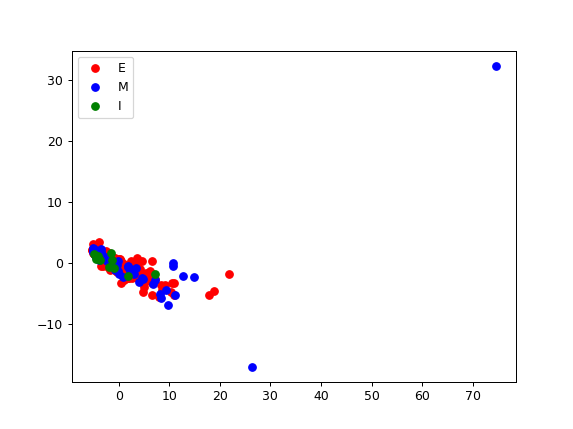

In [317]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
pca = PCA(2).fit(X)
X_ = pca.transform(X)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y1[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X, y1)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.38630160294645566

In [318]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 156)


/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3620729067689055

In [319]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 252)


0.38465695201290817

In [320]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X, y1)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.32765309115058616

In [321]:
from sklearn.svm import SVC

X, y = shuffle(X, y1)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change f

0.18513374663650087

## 2. Binarized data

<IPython.core.display.Javascript object>


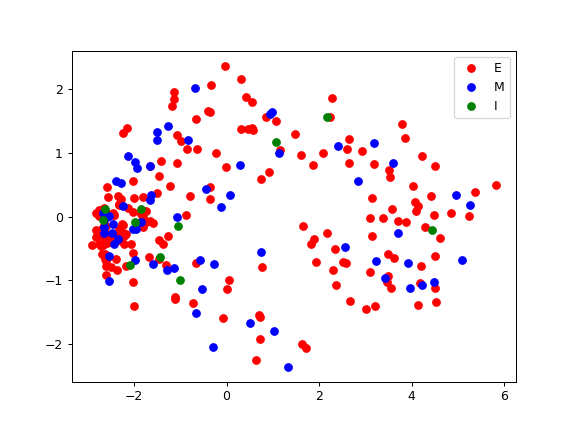

In [322]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
X = np.where(X <= 0, 0, 1)

pca = PCA(2).fit(X)
X_ = pca.transform(X)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y1[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X, y1)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.3332351576351822

In [323]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 156)


0.35499278740981405

In [324]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 185)


0.384503091559469

In [325]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X, y1)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.27887504461291873

In [326]:
from sklearn.svm import SVC

X, y = shuffle(X, y1)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-d

0.22812124880842277

# The Second Union

## 1. Not binarized data

<IPython.core.display.Javascript object>


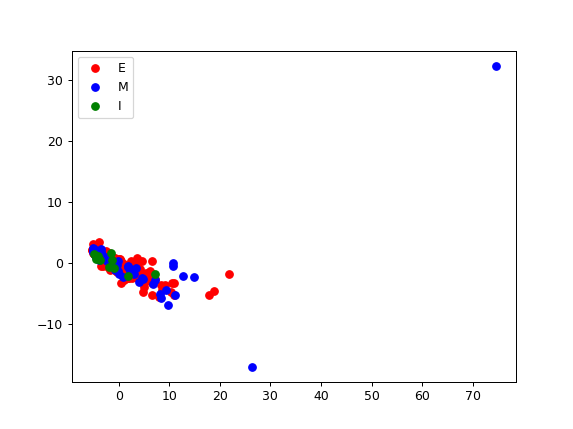

In [335]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
pca = PCA(2).fit(X)
X_ = pca.transform(X)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y1[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X, y1)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.3901787587747732

In [340]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 156)


0.36306531306531303

In [341]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 252)


0.3194249800699171

In [342]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X, y1)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2926328319906005

In [343]:
from sklearn.svm import SVC

X, y = shuffle(X, y1)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change f

0.2495068899798114

## 2. Binarized data

<IPython.core.display.Javascript object>


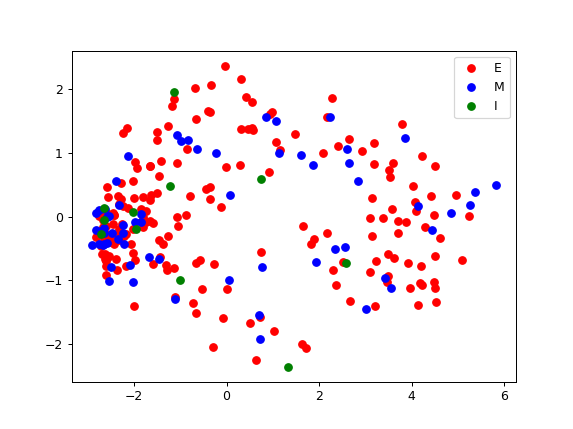

In [344]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
X = np.where(X <= 0, 0, 1)

pca = PCA(2).fit(X)
X_ = pca.transform(X)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y1[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X, y1)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.3332351576351822

In [345]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 156)


0.301586175150492

In [346]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 185)


0.31418403736552963

In [347]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X, y1)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3169046031124925

In [348]:
from sklearn.svm import SVC

X, y = shuffle(X, y1)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-d

0.1586391197268799